In [3]:
import pandas as pd


verbs = pd.read_csv('output/counts/merged-V.csv')

verbs

,count,item,construction
0,51,none,ma-TA-V
1,50,none,na-TA-V
2,41,kōrero,ma-TA-V
3,31,whakahaere,ma-TA-V
4,27,tangi,na-TA-V
...,...,...,...
626,1,arataki,ma-det-TA-V
627,1,anga,ma-TA-V
628,1,akona,na-TA-V
629,1,aituāngia,na-TA-V


In [4]:
verbs['tense'] = verbs['construction'].str.split('-').str[0]
verbs['AV'] = verbs['construction'].str.split('-').str[1] == 'det'

verbs

,count,item,construction,tense,AV
0,51,none,ma-TA-V,ma,False
1,50,none,na-TA-V,na,False
2,41,kōrero,ma-TA-V,ma,False
3,31,whakahaere,ma-TA-V,ma,False
4,27,tangi,na-TA-V,na,False
...,...,...,...,...,...
626,1,arataki,ma-det-TA-V,ma,True
627,1,anga,ma-TA-V,ma,False
628,1,akona,na-TA-V,na,False
629,1,aituāngia,na-TA-V,na,False


In [5]:
tense = verbs.pivot_table(columns='tense', values='count', index='item')
tense['Total'] = tense.sum(axis=1)

tense.sort_values(by='Total', ascending=False)

tense,ma,na,Total
item,,,
none,28.0,27.0,55.0
kōrero,26.0,5.5,31.5
tangi,NaN,27.0,27.0
whakahaere,20.0,5.0,25.0
mahi,15.0,9.0,24.0
...,...,...,...
tahuna,NaN,1.0,1.0
tahitahi,1.0,NaN,1.0
rūātoki,NaN,1.0,1.0


In [6]:
order = verbs.pivot_table(columns='AV', values='count', index='item')
order['Total'] = order.sum(axis=1)

order.sort_values(by='Total', ascending=False)

AV,False,True,Total
item,,,
none,50.5,4.5,55.0
kōrero,25.0,6.5,31.5
tangi,27.0,NaN,27.0
whakahaere,19.5,5.5,25.0
mahi,18.0,3.0,21.0
...,...,...,...
tahitahi,1.0,NaN,1.0
rūātoki,1.0,NaN,1.0
rūrū,1.0,NaN,1.0


AV              False      True     Total
item                                     
manaaki      0.004886  0.046392  0.012108
kōrero       0.027144  0.033505  0.028251
whakarite    0.005972  0.030928  0.010314
whakahaere   0.021173  0.028351  0.022422
ako          0.004886  0.023196  0.008072
...               ...       ...       ...
āhua         0.001629       NaN  0.001345
āwherika     0.001086       NaN  0.000897
āwhinatia    0.001086       NaN  0.000897
ō-maru-mutu  0.001086       NaN  0.000897
ū            0.001086       NaN  0.000897

[409 rows x 3 columns]


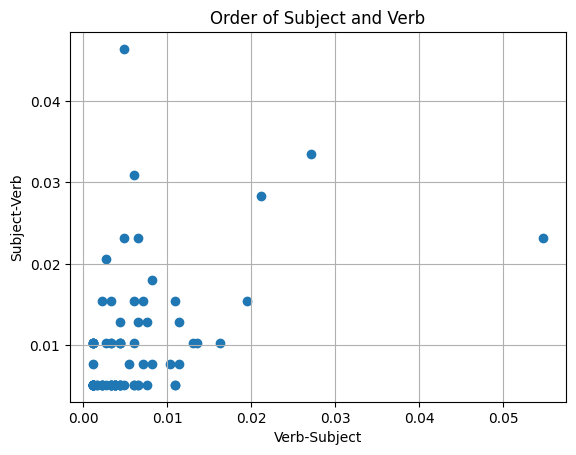

In [7]:
import matplotlib.pyplot as plt


chart = order / order.sum(axis=0)
print(chart.sort_values(by=True, ascending=False))

plt.scatter(chart[False], chart[True])
plt.title('Order of Subject and Verb')
plt.xlabel('Verb-Subject')
plt.ylabel('Subject-Verb')
plt.grid()

tense,ma,na,Total
item,,,
none,0.043750,0.045763,0.044715
kōrero,0.040625,0.009322,0.025610
whakahaere,0.031250,0.008475,0.020325
whiriwhiri,0.029687,0.003390,0.017073
mahi,0.023438,0.015254,0.019512
...,...,...,...
wā,NaN,0.001695,0.000813
wāwāhi,NaN,0.001695,0.000813
āwherika,NaN,0.001695,0.000813


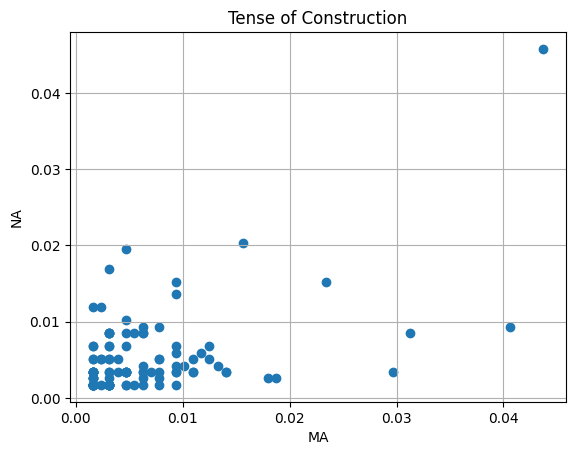

In [8]:
chart = tense / tense.sum(axis=0)
display(chart.sort_values(by='ma', ascending=False))

plt.scatter(chart['ma'], chart['na'])
plt.title('Tense of Construction')
plt.xlabel('MA')
plt.ylabel('NA')
plt.grid()

In [9]:
import os

n = 1
queries = [f[:-4] for f in os.listdir('output/results') if f.startswith('ka') and len(f.split('-')) > n]

bases = pd.DataFrame.from_dict(orient='index', columns=['count'], data={
    i: sum(1 for _ in open(f'output/results/{i}.txt'))
    for i in queries
}).sort_values(by='count', ascending=False)

display(bases)

if 'ka' in bases.T.columns:
    (bases / bases.T['ka']).plot(kind='bar', title='Proportion of total in each query')

plt.show()

,count
ka-S,6849
ka-S-ki,1167
ka-ki,1131
ka-i,734
ka-e,716
ka-S-i,646
ka-e-S,326
ka-i-S,161
ka-ki-S,153
ka-ki-i,81


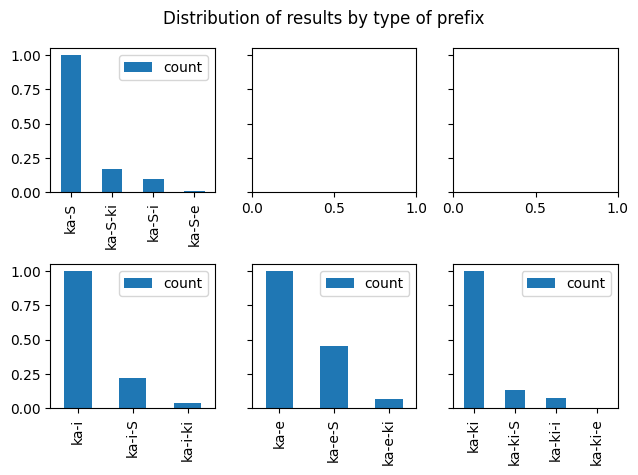

In [10]:
fig, ax = plt.subplots(ncols=3, nrows=2, sharey=True)

fig.suptitle('Distribution of results by type of prefix')

(bases[bases.index.str.startswith('ka-S')] / bases.T['ka-S']).plot(
    ax=ax[0,0],
    kind='bar'
)

(bases[bases.index.str.startswith('ka-i')] / bases.T['ka-i']).plot(
    ax=ax[1,0],
    kind='bar'
)

(bases[bases.index.str.startswith('ka-e')] / bases.T['ka-e']).plot(
    ax = ax[1,1],
    kind='bar'
)

(bases[bases.index.str.startswith('ka-ki')] / bases.T['ka-ki']).plot(
    ax = ax[1,2],
    kind='bar'
)

plt.tight_layout()

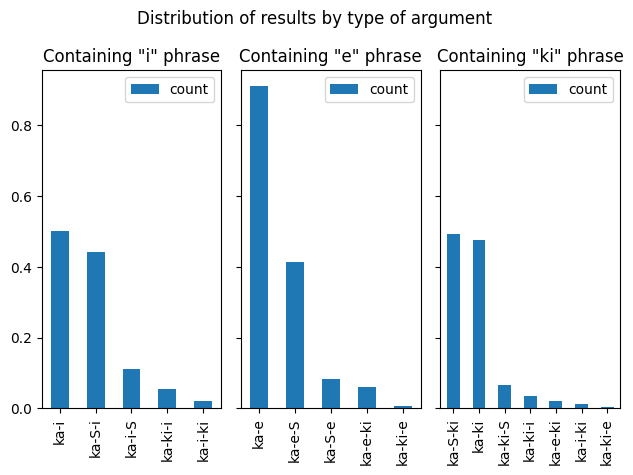

In [11]:
source = bases.T['ka-i'] + bases.T['ka-S-i'] + bases.T['ka-ki-i']
agent = bases.T['ka-e'] + bases.T['ka-S-e'] + bases.T['ka-ki-e']
goal = bases.T['ka-ki'] + bases.T['ka-S-ki'] + bases.T['ka-i-ki'] + bases.T['ka-e-ki']

fig, ax = plt.subplots(ncols=3, sharey=True)
fig.suptitle('Distribution of results by type of argument')

(bases[bases.index.str.contains('-i')] / source).plot(
    ax=ax[0],
    kind='bar',
    title='Containing "i" phrase'
)

(bases[bases.index.str.contains('-e')] / agent).plot(
    ax=ax[1],
    kind='bar',
    title='Containing "e" phrase'
)

(bases[bases.index.str.contains('-ki')] / goal).plot(
    ax=ax[2],
    kind='bar',
    title='Containing "ki" phrase'
)

plt.tight_layout()

In [12]:
verbs = pd.DataFrame()

names = ['base','noun'][:n+1]
for query in queries:
    df = pd.read_csv(f'output/bases/{query}.txt', header=None, names=names, usecols=[i+2 for i in range(n+1)])
    df['query'] = query
    verbs = pd.concat([verbs, df], ignore_index=True)

statives = pd.read_csv('input/sv.txt', header=None, names=['base'])
verbs['stative'] = verbs['base'].isin(statives['base'])

verbs[verbs['query'] == 'ka-i'].groupby(['base', 'stative']).count().reset_index().sort_values(by='query', ascending=False)

,base,stative,noun,query
107,riro,True,50,50
70,moe,False,50,50
48,kite,False,47,47
67,mau,False,42,42
92,puta,False,36,36
...,...,...,...,...
137,tiro,False,1,1
139,toe,False,1,1
39,hē,False,1,1
142,tohua,False,1,1


In [13]:
verbs_agg = verbs.groupby(['base','query']).size()
verbs_agg = verbs_agg.mask(verbs_agg < 3).dropna().sort_values(ascending=False).reset_index(name='count')

frequent_verbs = pd.merge(verbs_agg, verbs, on=['base','query'], how='left').drop(columns=['count'])

verbs_agg

,base,query,count
0,haere,ka-S,447.0
1,tū,ka-S,267.0
2,hoki,ka-S,245.0
3,puta,ka-S,241.0
4,kite,ka-S,210.0
...,...,...,...
630,tōia,ka-S-ki,3.0
631,ora,ka-i,3.0
632,oho,ka-S,3.0
633,nui,ka-S-i,3.0


In [14]:
pivot = frequent_verbs.pivot_table(index='query', columns='stative', aggfunc='count', values='base')
pivot = pivot.sort_index(key=pivot.sum(1).get, ascending=False)
display(pivot)

if 'ka' in pivot.T.columns:
    normed = pivot / pivot.T['ka']

    fig, ax = plt.subplots(nrows=2, sharex=True)
    normed.plot(
        ax=ax[0],
        kind='bar',
        title='Proportion of ordering to total by type of verb'
    )

    (pivot.div(pivot.sum(axis=1), axis=0)).plot(
        ax=ax[1],
        kind='bar',
        title='Proportion of type of verb to total by ordering'
    )
    ax[1].grid()

    plt.tight_layout()

stative,False,True
query,,
ka-S,5721.0,290.0
ka-S-ki,968.0,14.0
ka-ki,894.0,14.0
ka-i,413.0,76.0
ka-S-i,435.0,20.0
ka-e,445.0,NaN
ka-e-S,204.0,NaN
ka-i-S,63.0,30.0
ka-ki-S,90.0,NaN


query,ka-i,ka-S
base,,
moe,50.0,29.0
riro,50.0,36.0
kite,47.0,210.0
mau,42.0,80.0
puta,36.0,241.0
whai,25.0,60.0
rongo,18.0,85.0
oti,17.0,45.0
tīmata,16.0,174.0


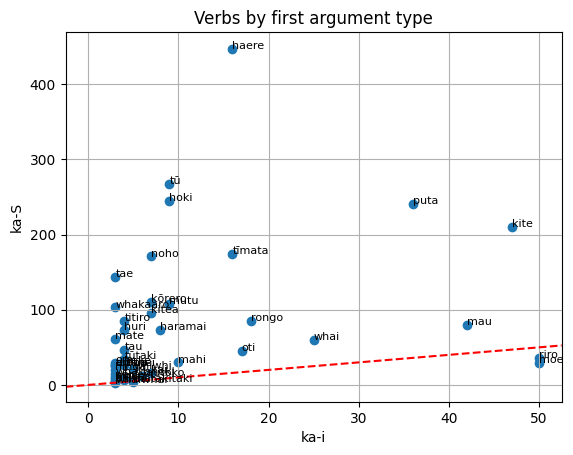

In [15]:
import numpy as np


xs = 'ka-i'
ys = 'ka-S'
quantile = 0.85
zoom = 0.85**0
index = 'base'
# index = 'noun'
df = frequent_verbs.pivot_table(index=index, columns='query', values='stative', aggfunc='count')[[xs, ys]].dropna()

# df = df / df.sum(axis=0)
# df = df.div(df.sum(axis=1), axis=0)

df = df.mask(df[xs] > df.quantile(zoom)[xs]).mask(df[ys] > df.quantile(zoom)[ys])
display(df.sort_values(by=xs, ascending=False))

plt.scatter(df[xs], df[ys])
# plt.scatter(np.log(df[xs]), np.log(df[ys]))
plt.axline((0, 0), slope=1, color='red', linestyle='--')

def annotate(quantile, df, xs, ys, exclude=True):
    threshold_x, threshold_y = df[xs].quantile(quantile), df[ys].quantile(quantile)
    for i, txt in enumerate(df.index):
        x, y = df[xs].iloc[i], df[ys].iloc[i]
        if exclude and x < threshold_x and y < threshold_y:
            continue
        plt.annotate(txt, (x, y), fontsize=8)

annotate(quantile, df, xs, ys, exclude=False)
plt.title('Verbs by first argument type')
plt.xlabel(xs)
plt.ylabel(ys)
plt.grid()

In [16]:
import re


possessives = pd.DataFrame()
for query in os.listdir('output/results'):
    if not query.startswith('poss'):
        continue

    query = query[:-4]  # Remove the '.txt' extension
    df = pd.DataFrame(open(f'output/results/{query}.txt').readlines(), columns=['phrase'])
    df['query'] = query
    possessives = pd.concat([possessives, df], ignore_index=True)


matcher = [re.compile(rf'\b({re.escape(verb)})([a-z]*nga)?\b') for verb in list(frequent_verbs['base'].unique()) + ['tiro', 'arahi']]
def find_nominalisation(row):
    for verb in matcher:
        m = verb.search(row['phrase'])
        if not m:
            continue

        return m.group(0), m.group(1)
    
    return None, None


sample = possessives
sample[['nominalisation', 'verb']] = sample.apply(find_nominalisation, axis=1, result_type='expand')

sample[sample['nominalisation'].notna()]

KeyboardInterrupt: 

In [ ]:
sample[sample['phrase'].str.contains('tiro')]

,phrase,query,nominalisation,verb
229,i ō tātou tirohanga\n,poss.O,tirohanga,tiro
246,i ō koutou tirohanga.\n,poss.O,tirohanga,tiro
837,"ki tō mātou titiro,\n",poss.O,titiro,titiro
960,"Ki ōna tirohanga ake,\n",poss.O,tirohanga,tiro
970,"Tō mātou kōtiro,\n",poss.O,None,None
...,...,...,...,...
36286,"ki tāku titiro ake,\n",poss.A,titiro,titiro
36288,tāku titiro\n,poss.A,titiro,titiro
36290,tā rātou titiro.\n,poss.A,titiro,titiro
36747,o tāku titiro\n,poss.A,titiro,titiro


In [ ]:
possessive_counts = sample.groupby(['verb', 'nominalisation', 'query']).count().reset_index().sort_values(by='phrase', ascending=False)
possessive_counts['exact'] = possessive_counts['nominalisation'] == possessive_counts['verb']
possessive_counts['stative'] = possessive_counts['verb'].isin(statives['base'])

possessive_counts.sort_values(by='phrase', ascending=False)

,verb,nominalisation,query,phrase,exact,stative
367,whakaaro,whakaaro,poss.O,528,True,False
126,mahi,mahi,poss.A,444,True,False
119,kōrero,kōrero,poss.A,429,True,False
127,mahi,mahi,poss.O,168,True,False
120,kōrero,kōrero,poss.O,120,True,False
...,...,...,...,...,...,...
65,huihui,huihui,poss.A,1,True,False
70,hāereere,hāereeretanga,poss.O,1,False,False
76,hīkoi,hīkoitanga,poss.O,1,False,False
77,inoi,inoi,poss.A,1,True,False


In [ ]:
possessive_counts[possessive_counts['query'] == 'poss.O']

,verb,nominalisation,query,phrase,exact,stative
367,whakaaro,whakaaro,poss.O,528,True,False
127,mahi,mahi,poss.O,168,True,False
120,kōrero,kōrero,poss.O,120,True,False
411,whānau,whānau,poss.O,102,True,False
296,tika,tikanga,poss.O,102,False,False
...,...,...,...,...,...,...
205,peke,peke,poss.O,1,True,False
206,peke,pekenga,poss.O,1,False,False
208,piki,pikinga,poss.O,1,False,False
229,pēhea,pēhea,poss.O,1,True,False


In [ ]:
possessive_counts.pivot_table(index='query', columns='stative', aggfunc='count', values='phrase')

stative,False,True
query,,
poss.A,179,3
poss.O,242,7


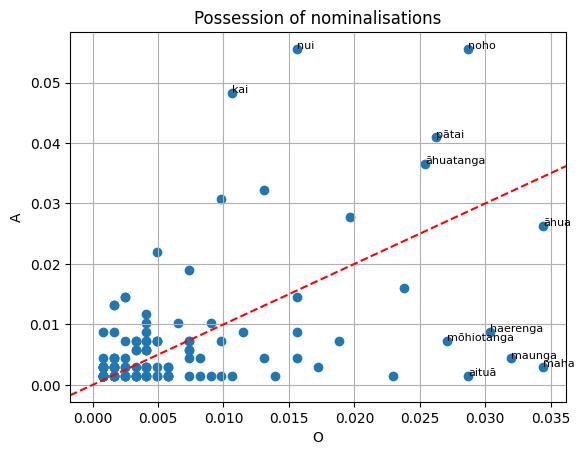

In [ ]:
df = possessive_counts.pivot_table(index='nominalisation', columns='query', aggfunc='sum', values='phrase')

zoom = 0.97**2
df = df.mask(df['poss.O'] > df.quantile(zoom)['poss.O']).mask(df['poss.A'] > df.quantile(zoom)['poss.A'])

df = df / df.sum(axis=0)
plt.scatter(df['poss.O'], df['poss.A'])
plt.axline((0, 0), slope=1, color='red', linestyle='--')
annotate(0.97, df, 'poss.O', 'poss.A')
plt.xlabel('O')
plt.ylabel('A')
plt.title('Possession of nominalisations')
plt.grid()